<a href="https://colab.research.google.com/github/jmmartinnu2/Pandas-finanzas/blob/main/data_finanzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTAMOS LIBRERIAS

In [64]:
import pandas as pd
import numpy as np


#FICHERO DE DATOS A TRABAJAR, LAS 100 MEJORES ACCIONES

In [113]:
url='https://raw.githubusercontent.com/jmmartinnu2/Pandas-finanzas/main/top-100-stocks-to-buy-08-16-2022.csv'

df = pd.read_csv(url)
print(df)

                                                Symbol  \
0                                           TRMDA.C.DX   
1                                            SHLF.O.DX   
2                                            ONCO.S.DX   
3                                           HAFNI.O.DX   
4                                            IPCO.S.DX   
..                                                 ...   
96                                              SII.FP   
97                                              FUR.NA   
98                                            CBK.D.DX   
99                                            NKT.C.DX   
100  Downloaded from Barchart.com as of 08-16-2022 ...   

                                    Name  Wtd Alpha   Rank  Prev Rank  \
0                               Torm Plc     224.89    1.0        NaN   
1                     Shelf Drilling Ltd     209.30    2.0        NaN   
2                        Oncopeptides Ab     206.73    3.0        NaN   
3          

#LONGITUD DEL DATASET

In [114]:
df.shape

(101, 12)

#Convertimos a Dataframe de pandas, y toda la información estará mejor estructurada

In [115]:
data = pd.DataFrame(df)
data

,Symbol,Name,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
0,TRMDA.C.DX,Torm Plc,224.89,1.0,NaN,135.200,-5.700,-4.05%,142.100,41.780,+171.16%,2022-08-15
1,SHLF.O.DX,Shelf Drilling Ltd,209.30,2.0,NaN,15.180,-0.360,-2.32%,24.500,3.780,+236.96%,2022-08-15
2,ONCO.S.DX,Oncopeptides Ab,206.73,3.0,NaN,44.025,-1.875,-4.08%,54.700,3.416,+16.16%,2022-08-15
3,HAFNI.O.DX,Hafnia Ltd,178.46,4.0,NaN,39.800,-0.900,-2.21%,43.300,14.840,+160.13%,2022-08-15
4,IPCO.S.DX,International Petroleum Corp/Sweden,172.14,5.0,7.0,103.900,-2.100,-1.98%,128.400,34.220,+172.27%,2022-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
96,SII.FP,Sii,38.32,97.0,NaN,51.600,-0.500,-0.96%,53.900,35.200,+29.00%,2022-08-14
97,FUR.NA,Fugro,38.17,99.0,NaN,10.920,0.010,+0.09%,14.300,6.289,+38.19%,2022-08-14
98,CBK.D.DX,Commerzbank Ag,38.05,98.0,NaN,7.100,-0.055,-0.77%,9.253,5.008,+30.18%,2022-08-15
99,NKT.C.DX,Nkt A/S,37.26,100.0,NaN,381.600,1.600,+0.42%,393.400,215.600,+21.45%,2022-08-15


#Queremos saber que valores tienen errores o están vacíos NaN

In [120]:
data.isna().sum()

Symbol        0
Name          0
Wtd Alpha     1
Rank          1
Prev Rank    87
Last          1
Change        1
%Chg          1
52W High      1
52W Low       1
52W %Chg      3
Time          1
dtype: int64

#Procedemos a eliminar valores vacíon o nulos

In [125]:
data[data.Name.isna()]
data['Name']=data['Name'].fillna('')
data['Wtd Alpha']=data['Wtd Alpha'].fillna(0.0)
data['Rank']=data['Rank'].fillna(0.0)
data['Prev Rank']=data['Prev Rank'].fillna(0.0)
data['Last']=data['Last'].fillna(0.0)
data['Change']=data['Change'].fillna(0.0)
data['%Chg']=data['%Chg'].fillna(0.0)
data['52W High']=data['52W High'].fillna(0.0)
data['52W Low']=data['52W Low'].fillna(0.0)
data['52W %Chg']=data['52W %Chg'].fillna(0.0)
data['Time']=data['Time'].fillna(0.0)


#Ya están eliminados los valores nulos o vacíos
data.isna().sum()

Symbol       0
Name         0
Wtd Alpha    0
Rank         0
Prev Rank    0
Last         0
Change       0
%Chg         0
52W High     0
52W Low      0
52W %Chg     0
Time         0
dtype: int64

#Ver de que tipo son las variables

In [122]:
data.dtypes

Symbol        object
Name          object
Wtd Alpha    float64
Rank         float64
Prev Rank    float64
Last         float64
Change       float64
%Chg          object
52W High     float64
52W Low      float64
52W %Chg      object
Time          object
dtype: object

#Cambiamos un tipo de variable por otro tipo. Por ejemplo el dato Time lo cambiamos formato fecha

In [126]:
data['Time'] = pd.to_datetime(data['Time'])
#Una vez cambiaod comprobamos
data.dtypes

Symbol               object
Name                 object
Wtd Alpha           float64
Rank                float64
Prev Rank           float64
Last                float64
Change              float64
%Chg                 object
52W High            float64
52W Low             float64
52W %Chg             object
Time         datetime64[ns]
dtype: object

#Primeros 5 registros del dataframe

In [127]:
data.head()

,Symbol,Name,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
0,TRMDA.C.DX,Torm Plc,224.89,1.0,0.0,135.200,-5.700,-4.05%,142.1,41.780,+171.16%,2022-08-15
1,SHLF.O.DX,Shelf Drilling Ltd,209.30,2.0,0.0,15.180,-0.360,-2.32%,24.5,3.780,+236.96%,2022-08-15
2,ONCO.S.DX,Oncopeptides Ab,206.73,3.0,0.0,44.025,-1.875,-4.08%,54.7,3.416,+16.16%,2022-08-15
3,HAFNI.O.DX,Hafnia Ltd,178.46,4.0,0.0,39.800,-0.900,-2.21%,43.3,14.840,+160.13%,2022-08-15
4,IPCO.S.DX,International Petroleum Corp/Sweden,172.14,5.0,7.0,103.900,-2.100,-1.98%,128.4,34.220,+172.27%,2022-08-15


#Si queremos podemos añadir a esos primeros registros la cantidad que queramos

In [128]:
data.head(15)

,Symbol,Name,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
0,TRMDA.C.DX,Torm Plc,224.89,1.0,0.0,135.200,-5.700,-4.05%,142.100,41.780,+171.16%,2022-08-15
1,SHLF.O.DX,Shelf Drilling Ltd,209.30,2.0,0.0,15.180,-0.360,-2.32%,24.500,3.780,+236.96%,2022-08-15
2,ONCO.S.DX,Oncopeptides Ab,206.73,3.0,0.0,44.025,-1.875,-4.08%,54.700,3.416,+16.16%,2022-08-15
3,HAFNI.O.DX,Hafnia Ltd,178.46,4.0,0.0,39.800,-0.900,-2.21%,43.300,14.840,+160.13%,2022-08-15
4,IPCO.S.DX,International Petroleum Corp/Sweden,172.14,5.0,7.0,103.900,-2.100,-1.98%,128.400,34.220,+172.27%,2022-08-15
5,ES.FP,Esso,166.91,6.0,0.0,52.000,-1.600,-2.99%,72.600,10.450,+385.98%,2022-08-14
6,ALCOG.FP,Cogra,160.06,7.0,0.0,17.800,0.800,+4.71%,18.800,6.740,+160.23%,2022-08-14
7,FLNG.O.DX,Flex Lng Ltd,157.63,8.0,12.0,329.600,1.000,+0.30%,339.400,122.000,+157.50%,2022-08-15
8,BORR.O.DX,Borr Drilling Ltd,152.97,9.0,0.0,35.847,-2.433,-6.36%,66.385,5.235,+505.52%,2022-08-15
9,NOR.O.DX,Norwegian Energy CO ASA,151.62,11.0,0.0,319.000,-7.000,-2.15%,480.500,132.500,+130.49%,2022-08-15


#Últimos 5 registros del dataframe

In [129]:
data.tail()

,Symbol,Name,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
96,SII.FP,Sii,38.32,97.0,0.0,51.60,-0.500,-0.96%,53.900,35.200,+29.00%,2022-08-14
97,FUR.NA,Fugro,38.17,99.0,0.0,10.92,0.010,+0.09%,14.300,6.289,+38.19%,2022-08-14
98,CBK.D.DX,Commerzbank Ag,38.05,98.0,0.0,7.10,-0.055,-0.77%,9.253,5.008,+30.18%,2022-08-15
99,NKT.C.DX,Nkt A/S,37.26,100.0,0.0,381.60,1.600,+0.42%,393.400,215.600,+21.45%,2022-08-15
100,Downloaded from Barchart.com as of 08-16-2022 ...,,0.00,0.0,0.0,0.00,0.000,0.0,0.000,0.000,0.0,1970-01-01


#Si queremos podemos añadir a esos últimos registros la cantidad que queramos

In [130]:
data.tail(15)

,Symbol,Name,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
86,ALOSM.FP,Osmozis,42.22,87.0,0.0,8.74,0.120,+1.39%,9.900,5.050,+49.40%,2022-08-14
87,SAABB.S.DX,Saab Ab,41.68,88.0,0.0,373.10,2.400,+0.65%,448.600,203.350,+46.03%,2022-08-15
88,ABIO.FP,Albioma,41.17,89.0,0.0,50.10,0.000,0.00%,50.850,29.220,+44.21%,2022-08-14
89,RAKP.O.DX,Rak Petroleum Plc,40.71,90.0,0.0,13.05,0.250,+1.95%,14.500,8.020,+49.31%,2022-08-15
90,ADP.FP,Adp,40.40,91.0,0.0,140.95,0.650,+0.46%,149.400,96.040,+38.59%,2022-08-14
91,OLG.FP,Ol Groupe,39.85,92.0,0.0,2.90,0.000,0.00%,3.260,1.875,+27.19%,2022-08-14
92,ALFEN.NA,Alfen,39.80,93.0,0.0,116.00,2.350,+2.07%,119.450,59.600,+28.89%,2022-08-14
93,BANI.BB,Banimmo A,39.44,94.0,0.0,4.40,0.100,+2.33%,4.560,2.960,+47.65%,2022-08-15
94,WENS.NA,Ishares Wens,39.41,96.0,0.0,6.10,-0.093,-1.50%,7.349,3.990,+40.39%,2022-08-14
95,PEN.O.DX,Panoro Energy ASA,39.36,95.0,0.0,29.24,-1.060,-3.50%,35.700,18.780,+40.92%,2022-08-15


#Eliminar filas. Vamos a eliminar la última fila del dataframe 

In [131]:
data.drop(index=data.index[-1],axis=0,inplace=True)
#Una vez elimnada la ultima fila, comprobamos

data

,Symbol,Name,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
0,TRMDA.C.DX,Torm Plc,224.89,1.0,0.0,135.200,-5.700,-4.05%,142.100,41.780,+171.16%,2022-08-15
1,SHLF.O.DX,Shelf Drilling Ltd,209.30,2.0,0.0,15.180,-0.360,-2.32%,24.500,3.780,+236.96%,2022-08-15
2,ONCO.S.DX,Oncopeptides Ab,206.73,3.0,0.0,44.025,-1.875,-4.08%,54.700,3.416,+16.16%,2022-08-15
3,HAFNI.O.DX,Hafnia Ltd,178.46,4.0,0.0,39.800,-0.900,-2.21%,43.300,14.840,+160.13%,2022-08-15
4,IPCO.S.DX,International Petroleum Corp/Sweden,172.14,5.0,7.0,103.900,-2.100,-1.98%,128.400,34.220,+172.27%,2022-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
95,PEN.O.DX,Panoro Energy ASA,39.36,95.0,0.0,29.240,-1.060,-3.50%,35.700,18.780,+40.92%,2022-08-15
96,SII.FP,Sii,38.32,97.0,0.0,51.600,-0.500,-0.96%,53.900,35.200,+29.00%,2022-08-14
97,FUR.NA,Fugro,38.17,99.0,0.0,10.920,0.010,+0.09%,14.300,6.289,+38.19%,2022-08-14
98,CBK.D.DX,Commerzbank Ag,38.05,98.0,0.0,7.100,-0.055,-0.77%,9.253,5.008,+30.18%,2022-08-15


#OPERACIONES CON EL DATAFRAME

In [132]:
#Calculamos algunas estadisticas generales de toda la dataframe
#Promedio (mean)
#Desviacion estandard (std)
#Valor minimo
#Valor maximo
#Cuartiles (25%, 50% y 75%)

data.describe()

,Wtd Alpha,Rank,Prev Rank,Last,Change,52W High,52W Low
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,78.343500,50.500000,4.640000,75.858150,-0.359820,85.403570,37.78756
std,43.007929,29.011492,13.169079,97.163315,2.676583,109.731509,50.73413
min,37.260000,1.000000,0.000000,2.250000,-14.400000,2.640000,1.11000
25%,47.875000,25.750000,0.000000,14.737500,-0.512500,16.270000,6.20300
50%,62.920000,50.500000,0.000000,34.300000,-0.030000,41.730000,15.40500
75%,92.615000,75.250000,0.000000,104.625000,0.442500,113.112500,43.07500
max,224.890000,100.000000,62.000000,381.600000,9.200000,480.500000,224.10000


#Cambiamos el índice de nuestra tabla. Ponemos el Nombre del activo ahora.

In [135]:
data.set_index('Name')

,Symbol,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
Name,,,,,,,,,,,
Torm Plc,TRMDA.C.DX,224.89,1.0,0.0,135.200,-5.700,-4.05%,142.100,41.780,+171.16%,2022-08-15
Shelf Drilling Ltd,SHLF.O.DX,209.30,2.0,0.0,15.180,-0.360,-2.32%,24.500,3.780,+236.96%,2022-08-15
Oncopeptides Ab,ONCO.S.DX,206.73,3.0,0.0,44.025,-1.875,-4.08%,54.700,3.416,+16.16%,2022-08-15
Hafnia Ltd,HAFNI.O.DX,178.46,4.0,0.0,39.800,-0.900,-2.21%,43.300,14.840,+160.13%,2022-08-15
International Petroleum Corp/Sweden,IPCO.S.DX,172.14,5.0,7.0,103.900,-2.100,-1.98%,128.400,34.220,+172.27%,2022-08-15
...,...,...,...,...,...,...,...,...,...,...,...
Panoro Energy ASA,PEN.O.DX,39.36,95.0,0.0,29.240,-1.060,-3.50%,35.700,18.780,+40.92%,2022-08-15
Sii,SII.FP,38.32,97.0,0.0,51.600,-0.500,-0.96%,53.900,35.200,+29.00%,2022-08-14
Fugro,FUR.NA,38.17,99.0,0.0,10.920,0.010,+0.09%,14.300,6.289,+38.19%,2022-08-14


#Cambiamos el nombre de una columna

In [146]:
data.rename({'Symbol': 'Símbolo', 'Name': 'Nombre', 'Wtd Alpha': 'Alfa', '': ''}, axis=1)



,Símbolo,Nombre,Alfa,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
0,TRMDA.C.DX,Torm Plc,224.89,1.0,0.0,135.200,-5.700,-4.05%,142.100,41.780,+171.16%,2022-08-15
1,SHLF.O.DX,Shelf Drilling Ltd,209.30,2.0,0.0,15.180,-0.360,-2.32%,24.500,3.780,+236.96%,2022-08-15
2,ONCO.S.DX,Oncopeptides Ab,206.73,3.0,0.0,44.025,-1.875,-4.08%,54.700,3.416,+16.16%,2022-08-15
3,HAFNI.O.DX,Hafnia Ltd,178.46,4.0,0.0,39.800,-0.900,-2.21%,43.300,14.840,+160.13%,2022-08-15
4,IPCO.S.DX,International Petroleum Corp/Sweden,172.14,5.0,7.0,103.900,-2.100,-1.98%,128.400,34.220,+172.27%,2022-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
95,PEN.O.DX,Panoro Energy ASA,39.36,95.0,0.0,29.240,-1.060,-3.50%,35.700,18.780,+40.92%,2022-08-15
96,SII.FP,Sii,38.32,97.0,0.0,51.600,-0.500,-0.96%,53.900,35.200,+29.00%,2022-08-14
97,FUR.NA,Fugro,38.17,99.0,0.0,10.920,0.010,+0.09%,14.300,6.289,+38.19%,2022-08-14
98,CBK.D.DX,Commerzbank Ag,38.05,98.0,0.0,7.100,-0.055,-0.77%,9.253,5.008,+30.18%,2022-08-15


In [148]:
data.set_index('Name')

,Symbol,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
Name,,,,,,,,,,,
Torm Plc,TRMDA.C.DX,224.89,1.0,0.0,135.200,-5.700,-4.05%,142.100,41.780,+171.16%,2022-08-15
Shelf Drilling Ltd,SHLF.O.DX,209.30,2.0,0.0,15.180,-0.360,-2.32%,24.500,3.780,+236.96%,2022-08-15
Oncopeptides Ab,ONCO.S.DX,206.73,3.0,0.0,44.025,-1.875,-4.08%,54.700,3.416,+16.16%,2022-08-15
Hafnia Ltd,HAFNI.O.DX,178.46,4.0,0.0,39.800,-0.900,-2.21%,43.300,14.840,+160.13%,2022-08-15
International Petroleum Corp/Sweden,IPCO.S.DX,172.14,5.0,7.0,103.900,-2.100,-1.98%,128.400,34.220,+172.27%,2022-08-15
...,...,...,...,...,...,...,...,...,...,...,...
Panoro Energy ASA,PEN.O.DX,39.36,95.0,0.0,29.240,-1.060,-3.50%,35.700,18.780,+40.92%,2022-08-15
Sii,SII.FP,38.32,97.0,0.0,51.600,-0.500,-0.96%,53.900,35.200,+29.00%,2022-08-14
Fugro,FUR.NA,38.17,99.0,0.0,10.920,0.010,+0.09%,14.300,6.289,+38.19%,2022-08-14


#Eliminamos una columna. En este caso Prev Rank

In [149]:
data.drop('Prev Rank',axis=1)

,Symbol,Name,Wtd Alpha,Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
0,TRMDA.C.DX,Torm Plc,224.89,1.0,135.200,-5.700,-4.05%,142.100,41.780,+171.16%,2022-08-15
1,SHLF.O.DX,Shelf Drilling Ltd,209.30,2.0,15.180,-0.360,-2.32%,24.500,3.780,+236.96%,2022-08-15
2,ONCO.S.DX,Oncopeptides Ab,206.73,3.0,44.025,-1.875,-4.08%,54.700,3.416,+16.16%,2022-08-15
3,HAFNI.O.DX,Hafnia Ltd,178.46,4.0,39.800,-0.900,-2.21%,43.300,14.840,+160.13%,2022-08-15
4,IPCO.S.DX,International Petroleum Corp/Sweden,172.14,5.0,103.900,-2.100,-1.98%,128.400,34.220,+172.27%,2022-08-15
...,...,...,...,...,...,...,...,...,...,...,...
95,PEN.O.DX,Panoro Energy ASA,39.36,95.0,29.240,-1.060,-3.50%,35.700,18.780,+40.92%,2022-08-15
96,SII.FP,Sii,38.32,97.0,51.600,-0.500,-0.96%,53.900,35.200,+29.00%,2022-08-14
97,FUR.NA,Fugro,38.17,99.0,10.920,0.010,+0.09%,14.300,6.289,+38.19%,2022-08-14
98,CBK.D.DX,Commerzbank Ag,38.05,98.0,7.100,-0.055,-0.77%,9.253,5.008,+30.18%,2022-08-15


#Seleccionamos filas y columnas con loc por etiquetas

In [162]:
#se selecciona el elemento que esta en la fila=B Col=Y
data.loc[2:2]

,Symbol,Name,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
2,ONCO.S.DX,Oncopeptides Ab,206.73,3.0,0.0,44.025,-1.875,-4.08%,54.7,3.416,+16.16%,2022-08-15


#Seleccionamos filas y columnas con iloc por índices

In [ ]:
#Se seleccionan los valores de la fila con indice 2
# recordar que los index empiezan en cero

In [163]:
data.iloc[2]

Symbol                 ONCO.S.DX
Name             Oncopeptides Ab
Wtd Alpha                 206.73
Rank                         3.0
Prev Rank                    0.0
Last                      44.025
Change                    -1.875
%Chg                      -4.08%
52W High                    54.7
52W Low                    3.416
52W %Chg                 +16.16%
Time         2022-08-15 00:00:00
Name: 2, dtype: object

#Hacemos ahora consultas donde buscamos ya resultados filtrados

In [186]:
#Seleccionamos todas las filas donde el valor de la columna Change sea mayor al 5%
data.query('Change >= 5')

,Symbol,Name,Wtd Alpha,Rank,Prev Rank,Last,Change,%Chg,52W High,52W Low,52W %Chg,Time
10,VSSAB.S.DX,Viking Supply Ships Ab,151.06,10.0,0.0,122.0,5.0,+4.27%,139.0,32.3,+204.24%,2022-08-15
64,ARGX.BB,Argenx Se,50.63,65.0,0.0,375.3,9.2,+2.51%,387.0,224.1,+40.77%,2022-08-15


#Ordenamos por nombre y calculamos el máximo

In [192]:
data.groupby('Name').mean()
data.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Symbol                        WNRG.NA
Name         Wallenius Wilhelmsen ASA
Wtd Alpha                      224.89
Rank                            100.0
Prev Rank                        62.0
Last                            381.6
Change                            9.2
%Chg                            0.00%
52W High                        480.5
52W Low                         224.1
Time              2022-08-15 00:00:00
dtype: object

#Ordenamos por nombre y calculamos el mínimo

In [193]:
data.groupby('Name').mean()
data.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Symbol                   ABIO.FP
Name           7C Solarparken Ag
Wtd Alpha                  37.26
Rank                         1.0
Prev Rank                    0.0
Last                        2.25
Change                     -14.4
%Chg                      +0.07%
52W High                    2.64
52W Low                     1.11
Time         2022-08-14 00:00:00
dtype: object

#VISUALIZACIÓN DE DATOS

In [197]:
#Cargamos la libreria grafica Matplotlib
import matplotlib.pyplot as plt

#Visualizamos un grafico sencillo

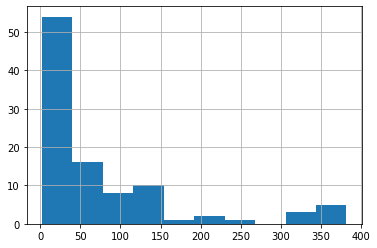

In [209]:
data['Last'].hist()

#Usamos estilos ggplot

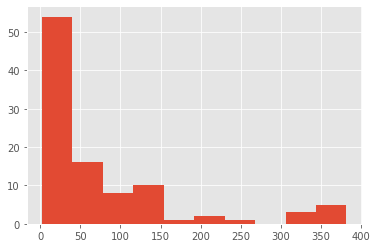

In [215]:
plt.style.use('ggplot')
#Asi se veria el grafico
data['Last'].hist()

#Tipos de gráficos en pandas:
Tipos de graficas en Pandas
Hay varios tipos de plots integradas a pandas, la mayoría de estos plots sobn para estadística por naturaleza:

            df.plot.area
            df.plot.barh
            df.plot.density
            df.plot.hist
            df.plot.line
            df.plot.scatter
            df.plot.bar
            df.plot.box
            df.plot.hexbin
            df.plot.kde
            df.plot.pie